#### Answers submitted by:  Jan-Willem van Heeswijck
#### Date:  08-31-17
---

# Python Part 3:  Pandas Exercises
---

## Q1:  Read in the libraries you need

In [158]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

In [159]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

## Q2:  Set options in pandas so it displays `max_rows` to 10

In [160]:
# set various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.precision', 3)

## Q3:  What versions of `Python` and `pandas` are you running?  



In [161]:
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.20.1
Numpy version: 1.12.1


In [162]:
# confirming which version of Python I am using
import sys
print("Python Version:", sys.version)

Python Version: 3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]


## Q4:  Read in the "olive" dataset that is available in this folder
Description:  572 olive oil samples from 3 different regions (and 9 sub-regions) of Italy; for each sample the normalized concentrations of 8 fatty acids are given.  
Source:  http://www2.chemie.uni-erlangen.de/publications/ANN-book/datasets/oliveoil/

There are 3 regions: 
* South
* North
* Sardinia

There are 9 sub-regions (areas): 
* North Apulia
* South Apulia
* Calabria
* Sicily
* Inland
* Coastal Sardinia
* Umbria
* East
* West Liguria

Supplemental report:  http://www.public.iastate.edu/~dicook/stat503/05/cs-olive.pdf

In [163]:
# read csv data into pandas dataframe
df = pd.read_csv('olive.csv')

## Q5:  How many rows and columns are in this dataframe?

In [164]:
df.shape

(572, 11)

## Q6:  Print the first 4 rows of the data

In [165]:
df.head(4)

,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35


## Q7:  How many different data types are in this dataframe, and what are the data types?

In [166]:
print(df.dtypes.unique().size)
print(df.dtypes)


2
Unnamed: 0     object
region          int64
area            int64
palmitic        int64
palmitoleic     int64
                ...  
oleic           int64
linoleic        int64
linolenic       int64
arachidic       int64
eicosenoic      int64
Length: 11, dtype: object


## Q8:  Create a new column
### Copy the column to:  'Unnamed: 0' to 'sub_region_raw'

In [167]:
df['sub_region_raw'] = df['Unnamed: 0']

## Q9:  Rename a column
### 'Unnamed: 0' to:  'sub_region_desc'

In [168]:
df.rename(columns={'Unnamed: 0':'sub_region_desc'}, inplace=True)
df.columns

Index(['sub_region_desc', 'region', 'area', 'palmitic', 'palmitoleic',
       'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic',
       'sub_region_raw'],
      dtype='object')

## Q10:  Rename the column 'area' to:  'sub_region'

In [169]:
df.rename(columns={'area':'sub_region'}, inplace=True)
df.columns

Index(['sub_region_desc', 'region', 'sub_region', 'palmitic', 'palmitoleic',
       'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic',
       'sub_region_raw'],
      dtype='object')

## Q11:  How many unique values of 'region' are there?

Hint:  the answer should be 3

In [170]:
df['region'].unique().size

3

## Q12:  How many unique values of 'sub_region' are there?

Hint:  the answer should be 9

In [171]:
 df['sub_region'].unique().size

9

## Q13:  How many unique values of 'sub_region_desc' are there?
Hint:  we would like the answer to be 9, but here's where we run into some messy data

In [172]:
df['sub_region_desc'].unique().size

572

## Q14:  Looks like 'sub_region_desc' has line numbers attached to the beginning of region name.  We need to do some data cleaning.  Can you remove them?  
```
 	region 	sub_region 	palmitic 	palmitoleic 	stearic 	oleic 	linoleic 	linolenic 	arachidic 	eicosenoic 	sub_region_raw
sub_region_desc 											
1.North-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
10.North-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
100.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
101.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
102.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
```

Hint:  check out this link
http://stackoverflow.com/questions/39583264/pandas-strip-numbers-and-parenthesis-from-string
 

In [173]:
df.sub_region_desc = df.sub_region_desc.str.replace('^\d+\.', '')
df.sub_region_desc.head(5)

0    North-Apulia
1    North-Apulia
2    North-Apulia
3    North-Apulia
4    North-Apulia
Name: sub_region_desc, dtype: object

## Q15:  Try again:  How many unique values of 'sub_region_desc' are there?
Hint:  you should see 9 of them!

In [174]:
 df.sub_region_desc.unique().size

9

## Q16:   Create a horizontal frequency barplot for 'region'

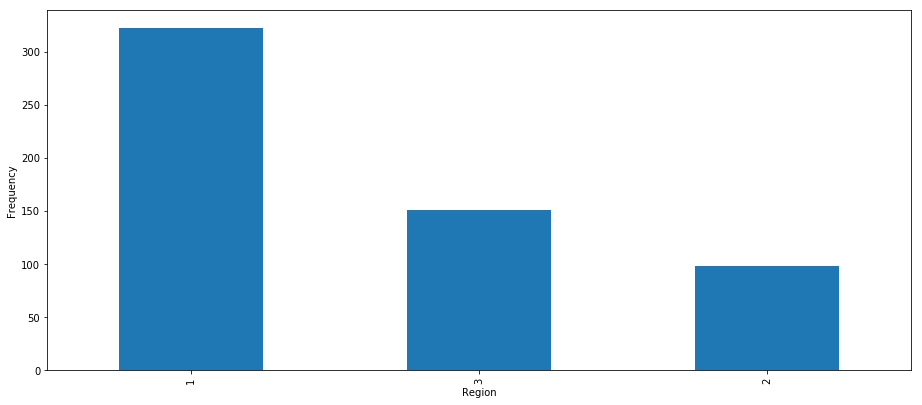

In [175]:
class HorizontalFrequencyPlotter(object):
    
    def __init__(self, series):
        self.data = series
        self.fig = plt.figure(figsize=(12,5))
    
    def plot(self):
        self.ax = self.fig.add_axes([0,0,1,1])
        self.data.value_counts().plot(kind='bar', ax=self.ax)
        self.ax.set_xlabel('Region')
        self.ax.set_ylabel('Frequency')
        
region_graph = HorizontalFrequencyPlotter(df.region)
region_graph.plot()

## Q17:   Create a horizontal frequency barplot for 'sub_region'

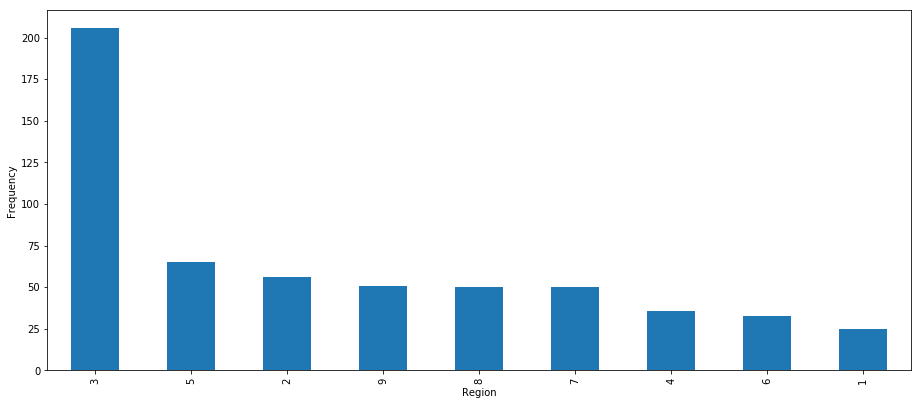

In [176]:
sub_region_graph = HorizontalFrequencyPlotter(df.sub_region)
sub_region_graph.plot()

## Q18:   Create a horizontal frequency barplot for 'sub_region_desc'

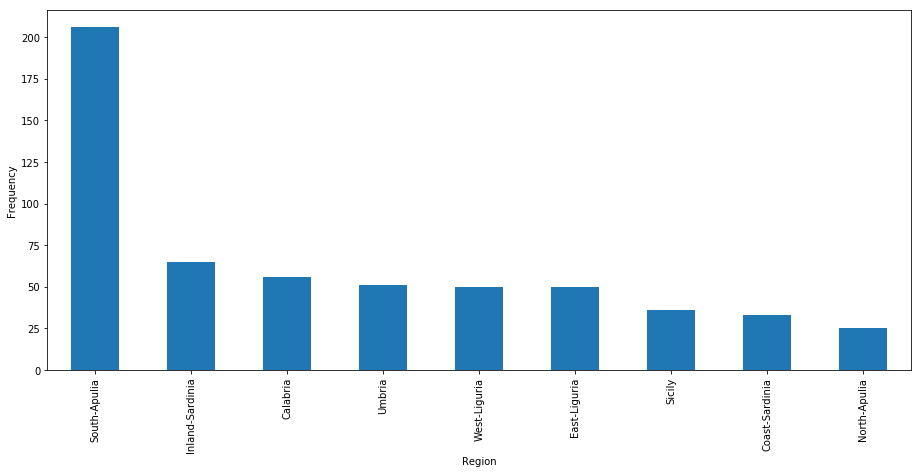

In [177]:
sub_region_desc_graph = HorizontalFrequencyPlotter(df.sub_region_desc)
sub_region_desc_graph.plot()